In [1]:
import matplotlib.pyplot as plt

from models import TransformerModelLooped
from curriculum import CurriculumSimple
from train import train_without_config, validate_model

n_dims = 10

In [2]:
model_loop_b5_b15 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=256,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5_b15 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [1000, 15, 1])

metrics_l1_b5_b15_d10 = train_without_config(
    model_loop_b5_b15, cirriculum_b5_b15, model_n_dims=n_dims, 
    log_every_steps=10, train_steps=15000, family="gpt2_loop", 
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.79M


  0%|          | 0/15000 [00:00<?, ?it/s]C:\Users\Vadim_K\DataspellProjects\looped_transformer\scripts\nano_gpt.py:79: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  y = torch.nn.functional.scaled_dot_product_attention(
loss 10.3147554397583:   0%|          | 1/15000 [00:00<2:14:38,  1.86it/s]

0


loss 2.5612874031066895: 100%|██████████| 15000/15000 [33:07<00:00,  7.55it/s]


In [3]:
model_loop_b5 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=256,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [1000, 5, 0])

metrics_l1_b5_d10 = train_without_config(
    model_loop_b5, cirriculum_b5, model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.79M


loss 10.780412673950195:   0%|          | 2/15000 [00:00<18:11, 13.74it/s]

0


loss 3.3746883869171143: 100%|██████████| 15000/15000 [16:17<00:00, 15.34it/s]


In [4]:
model_loop_b10 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=256,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b10 = CurriculumSimple(n_dims, 31, 10, [5000, n_dims, 0], [5000, 31, 0], [5000, 10, 0])

metrics_l1_b10_d10 = train_without_config(model_loop_b10, cirriculum_b10, model_n_dims=n_dims,
                                          log_every_steps=10, train_steps=15000, family="gpt2_loop",
                                          do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.79M


loss 9.931717872619629:   0%|          | 1/15000 [00:00<37:10,  6.72it/s]

0


loss 3.0334038734436035: 100%|██████████| 15000/15000 [29:00<00:00,  8.62it/s]


In [5]:
model_loop_b15 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=256,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b15 = CurriculumSimple(n_dims, 31, 15, [5000, n_dims, 0], [5000, 31, 0], [5000, 15, 0])

metrics_l1_b15_d10 = train_without_config(model_loop_b15, cirriculum_b15, model_n_dims=n_dims,
                                          log_every_steps=10, train_steps=15000, family="gpt2_loop",
                                          do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.79M


loss 9.732242584228516:   0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 2.745236396789551: 100%|██████████| 15000/15000 [43:18<00:00,  5.77it/s] 


In [6]:
model_loop_b5_b10 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=256,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5_b10 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [2000, 10, 1])

metrics_l1_b5_b10_d10 = train_without_config(
    model_loop_b5_b10, cirriculum_b5_b10, model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.79M


loss 10.90749454498291:   0%|          | 2/15000 [00:00<18:47, 13.30it/s]

0


loss 2.768103837966919: 100%|██████████| 15000/15000 [24:04<00:00, 10.39it/s] 


In [7]:
from tqdm import tqdm
def calculate_by_loop(model):
    val_by_loop = []
    loop_steps = []
    for i in tqdm(range(1, 150)):
        val_loss = validate_model(model, n_dims_truncated=10, n_loops=i, model_n_dims=10, n_points=31, family="gpt2_loop", task_name="noisy_linear_regression")
        val_by_loop.append(val_loss / n_dims)
        loop_steps.append(i)
    return loop_steps, val_by_loop

steps_b10, values_b10 = calculate_by_loop(model_loop_b10)
steps_b5, values_b5 = calculate_by_loop(model_loop_b5)
steps_b5_b15, values_b5_b15 = calculate_by_loop(model_loop_b5_b15)
steps_b15, values_b15 = calculate_by_loop(model_loop_b15)
steps_b5_b10, values_b5_b10 = calculate_by_loop(model_loop_b5_b10)

100%|██████████| 149/149 [11:05<00:00,  4.46s/it]


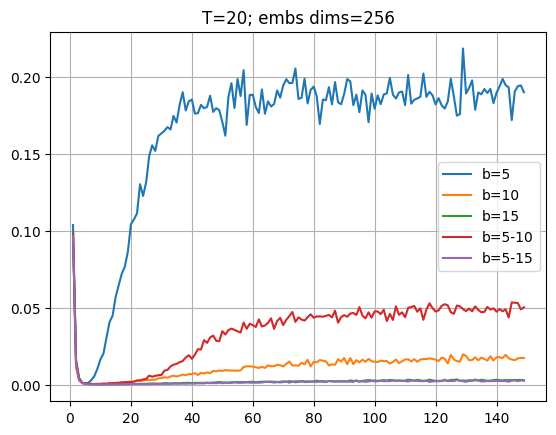

In [11]:
plt.plot(steps_b5, values_b5)
plt.plot(steps_b10, values_b10)
plt.plot(steps_b15, values_b15)
plt.plot(steps_b5_b10, values_b5_b10)
plt.plot(steps_b5_b15, values_b5_b15)
plt.grid()
plt.title("T=20; embs dims=256")
plt.legend(["b=5", "b=10", "b=15", "b=5-10", "b=5-15", ])
plt.savefig('../images/check_for_scheduling_convergence_properties_noisy_linear_regression_256.png')